# Mask R-CNN Training (Demo)


This notebook shows how to train Mask R-CNN ([by Matterport](https://github.com/matterport/Mask_RCNN)) on your own dataset.
This is a demo version which allows you to train your detector for 1 class.

The full tutorial is available here: [Tutorial](https://pysource.com/2021/08/10/train-mask-r-cnn-for-image-segmentation-online-free-gpu)

---

**With the FULL VERSION YOU CAN:**
- Train for multiple classes
- Improve accuracy (longer training and bigger images)
- Import the custom detector on Python with Opencv
- Run detector in realtime on a Video or from a Webcam
- Continue the training (if interrupted)
- Integration with Google Drive (to save there weigths and images)
- Evaluate the accuracy of your Model

You can get the FULL Version here: [Mask RCNN PRO](https://pysource.com/mask-rcnn-training-pro/)

---





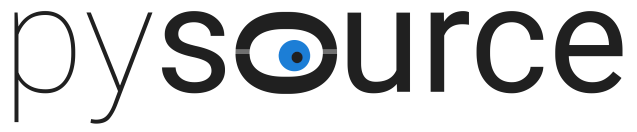

## **1. Installation**

Load your dataset

In [ ]:
# %pip install tensorflow==1.15.0
# %pip install --upgrade h5py==2.10.0
# !wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
# !unzip Mask_RCNN_basic_1.zip
# import sys
# sys.path
# sys.path.append("/Mask_RCNN/mrcnn")
# from Mask_RCNN.mrcnn.m_rcnn import *
# %matplotlib inline

In [ ]:
# !nvidia-smi

## **2. Image Dataset**

Load your annotated dataset


In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
savedRootDir = ROOT_DIR

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from m_rcnn import *

# Extract Images
images_path = "samples\\all_classes"
images_file_name = "dataset.zip"
annotations_path = "samples\\all_classes\\annotations.json"

images_full_path = os.path.join(savedRootDir,images_path)
extracted_dataset_path = os.path.join(images_full_path, images_file_name.split(".")[0])
extract_images(os.path.join(images_full_path, images_file_name), extracted_dataset_path)

Using TensorFlow backend.


VERS 0.2
Extracted: 96 images


In [2]:
dataset_train = load_image_dataset(os.path.join(savedRootDir, annotations_path), extracted_dataset_path, "train")
dataset_val = load_image_dataset(os.path.join(savedRootDir, annotations_path), extracted_dataset_path, "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  c:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\all_classes\annotations.json
Annotation json path:  c:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\all_classes\annotations.json
Train: 76
Validation: 20
Classes: 10


In [ ]:
# # Load image samples
# display_image_samples(dataset_train)

##**3. Training**

Train Mask RCNN on your custom Dataset.

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
config.display()
model = load_training_model(config, "custom", r"C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\logs\object20220510T2146\mask_rcnn_object_0060.h5")

In [ ]:
# # Start Training
# # This operation might take a long time.
# train_head(model, dataset_train, dataset_val, config)

In [ ]:
train_stage4plus(model, dataset_train, dataset_val, config)

In [ ]:
# train_all_layers(model, dataset_train, dataset_val, config)

## **4. Detection (test your model on a random image)**

In [ ]:
# # Load Test Model
# # The latest trained model will be loaded
# test_model, inference_config = load_test_model(class_number)

In [3]:
# Load Test Model 1
# test_model, inference_config = load_test_model(class_number, r"C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\logs\object20220507T2153_200steps_batch2_epoch20_head10+all10\mask_rcnn_object_0020.h5")
test_model, inference_config = load_test_model(class_number, r"C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\logs\object20220510T2146\mask_rcnn_object_0060.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\logs\object20220510T2146\mask_rcnn_object_0060.h5
Re-starting from epoch 60
Model: "mask_rcnn"
________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                      Output Shape                                Param #                 Connected to                                                      
input_image (InputLayer)                                          (None, None, None, 3

In [4]:
# Load Test Model 2
# test_model2, inference_config2 = load_test_model(class_number, r"C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\logs\object20220510T2146\mask_rcnn_object_0060.h5")
test_model2, inference_config2 = load_test_model(class_number, r"C:\Users\vlads\Downloads\mask_rcnn_object_0080_latest.h5")
# epoch60 (4+) better than epoch80(all); varbūt vēl 20 epochs(all) lai būtu epoch100(all)?
# NOTE: trenējot pēc 60 epochs visus slāņus (all), modelis sliktāk atpazina sejas!!!

Loading weights from  C:\Users\vlads\Downloads\mask_rcnn_object_0080_latest.h5
Model: "mask_rcnn"
________________________________________________________________________________________________________________________________________________________________________________________________________
Layer (type)                                                      Output Shape                                Param #                 Connected to                                                      
input_image (InputLayer)                                          (None, None, None, 3)                       0                                                                                         
________________________________________________________________________________________________________________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D)                                  (None, None, None, 3)           

In [ ]:
# # Test on a random image (from VALIDATION SET)
# test_random_image(test_model, dataset_val, inference_config)

In [10]:
# Make a copy of validation set to create a test set
import copy
dataset_test = copy.deepcopy(dataset_val)

In [11]:
# Get file names from testset folder
from os import listdir
from os.path import isfile, join
dataset_test_path = r"C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\Mask_RCNN_old\samples\all_classes\dataset_test"
onlyfiles = [f for f in listdir(dataset_test_path) if isfile(join(dataset_test_path, f))]

In [12]:
for i, file_name in enumerate(onlyfiles):

    # Get image path
    image_path = '\\'.join([dataset_test_path, file_name])

    # Edit and create entries in test set (only path is important)
    # (other params are not important; need only to show prediction)
    try:
        dataset_test.image_info[i]['path'] = image_path

    except:
        dataset_test.image_info.append({})
        dataset_test.image_info[i]['path'] = image_path
        dataset_test.image_info[i]['width'] = 1024
        dataset_test.image_info[i]['height'] = 1024
        dataset_test.image_info[i]['source'] = ''

    finally:
        dataset_test.image_info[i]['annotations'] = [{
            'id': 0, 'iscrowd': 0, 'image_id': 0, 'category_id': 0, 'segmentation': [[0,0,1,1]], 'bbox': [0,0,0,0], 'area': 0
        }]

In [ ]:
#  # CUSTOM SET TEST
# image_nr = 12
# dataset_test.image_info[0]['path'] = rf"C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\all_classes\other_dataset_test\{image_nr}.jpg"
# test_image_by_id(test_model, dataset_test, inference_config, 0)
# test_image_by_id(test_model2, dataset_test, inference_config2, 0)

In [19]:
image_id = 85
# to test: 1, 3, 13, 88, 90, 91, 92, 93, 94

2
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[3 2 1 9 3 2 6]
[[1 1]
 [2 2]
 [3 2]
 [6 1]
 [9 1]]
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[3 1 2 2 2 9 9 6 1]
[[1 2]
 [2 3]
 [3 1]
 [6 1]
 [9 2]]


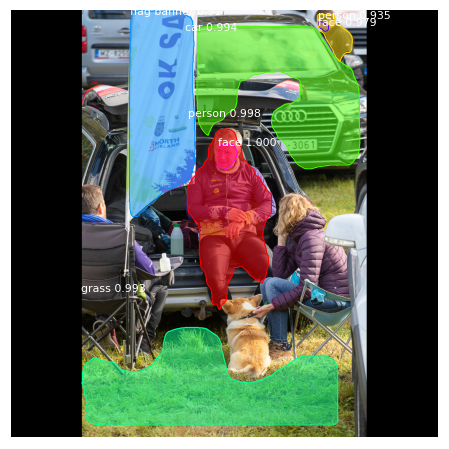

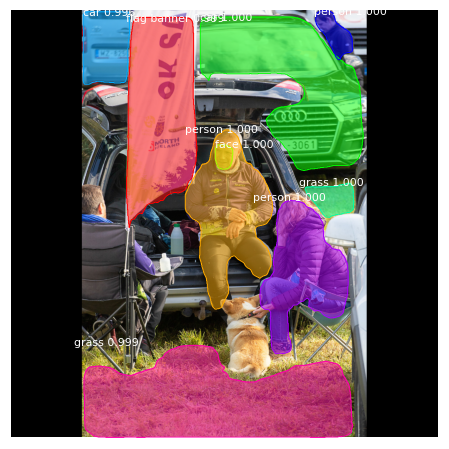

In [15]:
# VALIDATION SET
# Test on a specific image
print(image_id)
test_image_by_id(test_model, dataset_val, inference_config, image_id)
test_image_by_id(test_model2, dataset_val, inference_config2, image_id)

image_id += 1

130
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[3 2 3 2 2 3 7]
[[2 3]
 [3 3]
 [7 1]]
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 23)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[2 2 2 3 3 3 7 7 2]
[[2 4]
 [3 3]
 [7 2]]


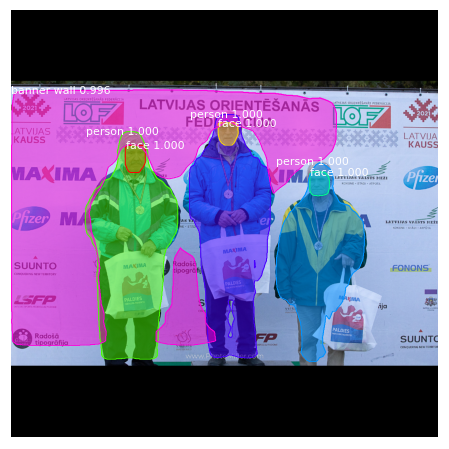

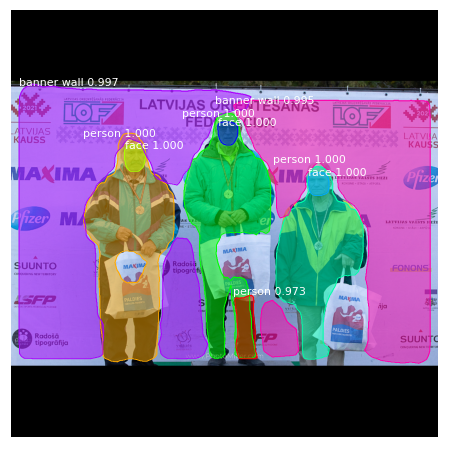

In [65]:
# TESTSET
# Test on a specific image
print(image_id)
test_image_by_id(test_model, dataset_test, inference_config, image_id)
test_image_by_id(test_model2, dataset_test, inference_config2, image_id)

image_id += 1

In [ ]:
# tensorboard --logdir="C:\Users\vlads\Desktop\LU\4. kurss\8.sem\BakalauraDarbs\MaskRCNN_git\BakalauraDarbs\samples\logs" --host=localhost --port=5000